In [1]:
import pandas as pd
import glob
import os
import ntpath
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import matplotlib
from matplotlib.font_manager import FontProperties
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
import os
import statistics
import pymatgen as pmg
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CutOffDictNN
from pymatgen.core import Structure

import logging, sys
logging.disable(sys.maxsize)
import statistics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(os.path.join("../output_data/bsdos/parabolic/prim-ext-min-4/all_ovlpcorr.csv"))
df_filtered = pd.read_csv(os.path.join("../output_data/bsdos/parabolic/prim-ext-min-4/prim_results/filtered_1.csv"))
df_filtered_her = pd.read_csv(os.path.join("../output_data/bsdos/parabolic/prim-ext-min-4/prim_results/filtered_her_all.csv"))
df_filtered_oer = pd.read_csv(os.path.join("../output_data/bsdos/parabolic/prim-ext-min-4/prim_results/filtered_oer_all.csv"))

In [3]:
df

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,direct_band_gap,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr
0,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,False,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918
1,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,False,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918
2,97379,-2.515671,-1.710665,0.805005,17070N2_ddec.cif,e54a8daf-16d8-4160-8ff5-48ab587b5ce7,2.012077,4.715697e-04,-4.527748,-3.722743,...,False,0.805014,Y-\Gamma,-2.515340,-1.710325,1160.558066,0.826511,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.598636,0.540438
3,97379,-2.515671,-1.710665,0.805005,17070N2_ddec.cif,e54a8daf-16d8-4160-8ff5-48ab587b5ce7,2.012077,4.715697e-04,-4.527748,-3.722743,...,False,0.805014,Y-\Gamma,-2.515340,-1.710325,1160.558066,0.826511,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.598636,0.540438
4,97463,-2.161858,-0.675817,1.486041,17151N2_ddec.cif,8edc1f8b-7df7-4762-8acb-f358fcc0d971,1.947790,5.108265e-05,-4.109648,-2.623607,...,False,1.484803,\Gamma-Y,-2.162070,-0.677267,0.901133,15.308723,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.671490,0.620978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,111345,-2.677306,-0.812993,1.864312,07000N2_ddec.cif,eba45d2d-54c1-40bd-ab8f-d5c5cbaeb157,1.847228,1.432319e-05,-4.524534,-2.660221,...,False,1.864346,Y-\Gamma,-2.677224,-0.812878,416.074173,0.167268,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.526269,0.460436
415,111643,-4.240020,-0.714874,3.525144,07010N3_ddec.cif,dada8bd9-ace3-4013-9140-19eaaa70e66f,1.827913,4.872614e-08,-6.067933,-2.542787,...,True,3.524483,\Gamma-\Gamma,-4.239913,-0.715431,6.024766,3.431422,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.666409,0.615362
416,110720,-1.568668,1.482661,3.051328,05000N2_ddec.cif,c4232c59-6cb9-485f-b450-769d2dd545bf,4.191745,1.944522e-02,-5.760413,-2.709084,...,False,3.047654,Z-\Gamma,-1.566883,1.480771,55.616361,0.397182,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.522836,0.456640
417,111095,-1.635956,0.389956,2.025910,07002N2_ddec.cif,e1e78edf-01b4-4520-ad63-0953e75a0a46,2.932734,3.617190e-04,-4.568689,-2.542778,...,False,2.015168,\Gamma-Z,-1.636102,0.379066,1.783905,3.962873,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.562790,0.500810


In [4]:
def get_relaxed_filename(row):
    
    return "../output_data/cifs/relaxed_structures/opt_opt/"+row['label']

In [5]:
df['relaxed_file'] = df.apply(lambda row: get_relaxed_filename(row), axis=1)
df

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
0,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918,../output_data/cifs/relaxed_structures/opt_opt...
1,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918,../output_data/cifs/relaxed_structures/opt_opt...
2,97379,-2.515671,-1.710665,0.805005,17070N2_ddec.cif,e54a8daf-16d8-4160-8ff5-48ab587b5ce7,2.012077,4.715697e-04,-4.527748,-3.722743,...,0.805014,Y-\Gamma,-2.515340,-1.710325,1160.558066,0.826511,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.598636,0.540438,../output_data/cifs/relaxed_structures/opt_opt...
3,97379,-2.515671,-1.710665,0.805005,17070N2_ddec.cif,e54a8daf-16d8-4160-8ff5-48ab587b5ce7,2.012077,4.715697e-04,-4.527748,-3.722743,...,0.805014,Y-\Gamma,-2.515340,-1.710325,1160.558066,0.826511,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.598636,0.540438,../output_data/cifs/relaxed_structures/opt_opt...
4,97463,-2.161858,-0.675817,1.486041,17151N2_ddec.cif,8edc1f8b-7df7-4762-8acb-f358fcc0d971,1.947790,5.108265e-05,-4.109648,-2.623607,...,1.484803,\Gamma-Y,-2.162070,-0.677267,0.901133,15.308723,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.671490,0.620978,../output_data/cifs/relaxed_structures/opt_opt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,111345,-2.677306,-0.812993,1.864312,07000N2_ddec.cif,eba45d2d-54c1-40bd-ab8f-d5c5cbaeb157,1.847228,1.432319e-05,-4.524534,-2.660221,...,1.864346,Y-\Gamma,-2.677224,-0.812878,416.074173,0.167268,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.526269,0.460436,../output_data/cifs/relaxed_structures/opt_opt...
415,111643,-4.240020,-0.714874,3.525144,07010N3_ddec.cif,dada8bd9-ace3-4013-9140-19eaaa70e66f,1.827913,4.872614e-08,-6.067933,-2.542787,...,3.524483,\Gamma-\Gamma,-4.239913,-0.715431,6.024766,3.431422,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.666409,0.615362,../output_data/cifs/relaxed_structures/opt_opt...
416,110720,-1.568668,1.482661,3.051328,05000N2_ddec.cif,c4232c59-6cb9-485f-b450-769d2dd545bf,4.191745,1.944522e-02,-5.760413,-2.709084,...,3.047654,Z-\Gamma,-1.566883,1.480771,55.616361,0.397182,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.522836,0.456640,../output_data/cifs/relaxed_structures/opt_opt...
417,111095,-1.635956,0.389956,2.025910,07002N2_ddec.cif,e1e78edf-01b4-4520-ad63-0953e75a0a46,2.932734,3.617190e-04,-4.568689,-2.542778,...,2.015168,\Gamma-Z,-1.636102,0.379066,1.783905,3.962873,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.562790,0.500810,../output_data/cifs/relaxed_structures/opt_opt...


In [6]:
# def get_ligands(row):
#     VestaCutoffDictNN = CutOffDictNN.from_preset("vesta_2019")
#     s = Structure.from_file(row['relaxed_file'])
#     sg = StructureGraph.with_local_env_strategy(s, VestaCutoffDictNN)
    
#     ligands_en = []
#     for i, site in enumerate(s.sites):
#         if site.specie.is_metal:
#             css = sg.get_connected_sites(i)
#             return css

# def get_ligand_electronegativities(row):
#     return [cs.site.specie.X for cs in row['ligands']]

# def get_ligand_atomic_radii(row):
#     return [cs.site.specie.atomic_radius for cs in row['ligands']]
    

# def has_element_in_ligand(row, element):
#     els = [cs.site.specie for cs in row['ligands']]
#     if pmg.core.periodic_table.Element(element) in els:
#         return True
#     else:
#         return False
    
# def get_ligand_eldf.to

# def get_num_element_in_ligand(row, element):
#     return len([x for x in row['ligand_elements'] if x ==  pmg.core.periodic_table.Element(element)])

In [82]:
# df['ligands'] = df.apply(get_ligands, axis=1) #won't work like this for COFs because we don't have the metal site

In [83]:
# df['ligand_elements'] = df.apply(get_ligand_elements, axis=1)

# df['S_in_ligand'] = df.apply(has_element_in_ligand, args="S", axis=1)
# df['N_in_ligand'] = df.apply(has_element_in_ligand, args="N", axis=1)

# df['Num_N_ligands'] = df.apply(get_num_element_in_ligand, args="N", axis=1)
# df['Num_S_ligands'] = df.apply(get_num_element_in_ligand, args="S", axis=1)

# df['lind_electronegativities'] = df.apply(get_ligand_electronegativities,axis=1)
# df['ligand_atomic_radii'] = df.apply(get_ligand_atomic_radii,axis=1)

In [17]:
## parameters for plotting
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

fig_sizes = set_size(345)
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams['axes.labelsize'] = 16
HER = -4.4
OER = -5.629
VIS_E = 3.2

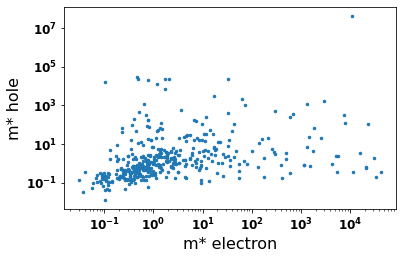

In [13]:
plt.figure()

plt.yscale("log")
plt.xscale("log")

plt.scatter(df['effective_mass_hole'], df['effective_mass_electron'])
#plt.title('')
# plt.xlim([1,1])
# plt.ylim([1,1])
plt.xlabel('m* electron')
plt.ylabel('m* hole')
plt.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

In [14]:
filt_ovlp = df[(df['spatial_overlap_corr']<0.7)]

In [9]:
df_exc = pd.concat([df,df_filtered]).drop_duplicates(keep=False)

<Figure size 432x288 with 0 Axes>

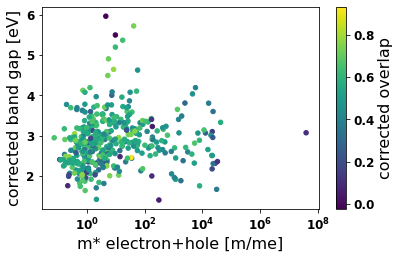

In [16]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')

points = ax.scatter(df['effective_mass_hole']+df['effective_mass_electron'],df['bandgap_corr'],c=df['spatial_overlap_corr'], s=20)
clb = f.colorbar(points, orientation='vertical')
clb.set_label('corrected overlap', size=16)
#plt.title('')
# ax.set_xlim([1,1])
# ax.set_ylim([1,4])
plt.xlabel('m* electron+hole [m/me]')
plt.ylabel('corrected band gap [eV]')
plt.tick_params(labelsize=12)
clb.ax.tick_params(labelsize=12)
plt.tight_layout()
# plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/all.pdf")
plt.show()

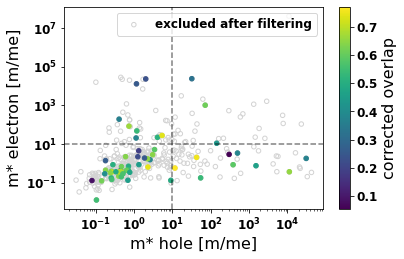

In [15]:
# plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

exc = ax.scatter(df_exc['effective_mass_hole'],df_exc['effective_mass_electron'], facecolors='none', edgecolors='lightgray', s=20)
points = ax.scatter(df_filtered['effective_mass_hole'],df_filtered['effective_mass_electron'],c=df_filtered['spatial_overlap_corr'], s=20)

exc.set_label('excluded after filtering')
ax.legend(fontsize=12,loc='upper right')

clb = f.colorbar(points, orientation='vertical')
clb.set_label('corrected overlap',size=16)
#plt.title('')
# ax.set_xlim([1,1])
# ax.set_ylim([1,4])
ax.axhline(y=10, color='black', linestyle='--',alpha=0.5)
ax.axvline(x=10, color='black', linestyle='--',alpha=0.5)

plt.xlabel('m* hole [m/me]')
plt.ylabel('m* electron [m/me]')
plt.tick_params(labelsize=12)
clb.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/all_wfilter.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

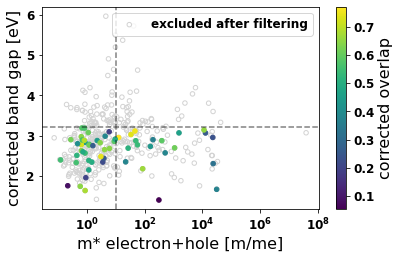

In [15]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')

exc = ax.scatter(df_exc['effective_mass_hole']+df_exc['effective_mass_electron'], df_exc['bandgap_corr'], facecolors='none', edgecolors='lightgray', s=20)
points = ax.scatter(df_filtered['effective_mass_hole']+df_filtered['effective_mass_electron'], df_filtered['bandgap_corr'], c=df_filtered['spatial_overlap_corr'], s=20)

exc.set_label('excluded after filtering')
ax.legend(fontsize=12,loc='upper right')

clb = f.colorbar(points, orientation='vertical')
clb.set_label('corrected overlap',size=16)
#plt.title('')
# ax.set_xlim([1,1])
# ax.set_ylim([1,4])
ax.axhline(y=VIS_E, color='black', linestyle='--',alpha=0.5)
ax.axvline(x=10, color='black', linestyle='--',alpha=0.5)

plt.xlabel('m* electron+hole [m/me]')
plt.ylabel('corrected band gap [eV]')
plt.tick_params(labelsize=12)
clb.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/all_wfilter_bg.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

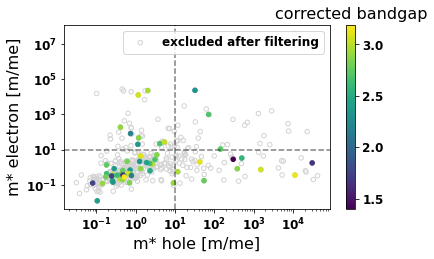

In [16]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

exc = ax.scatter(df_exc['effective_mass_hole'],df_exc['effective_mass_electron'], facecolors='none', edgecolors='lightgray', s=20)
points = ax.scatter(df_filtered['effective_mass_hole'],df_filtered['effective_mass_electron'],c=df_filtered['bandgap_corr'], s=20)

exc.set_label('excluded after filtering')
ax.legend(fontsize=12,loc='upper right')

clb = f.colorbar(points, orientation='vertical')
clb.ax.set_title('corrected bandgap',size=16)
#plt.title('')
# ax.set_xlim([1,1])
# ax.set_ylim([1,4])

ax.axhline(y=10, color='black', linestyle='--',alpha=0.5)
ax.axvline(x=10, color='black', linestyle='--',alpha=0.5)

plt.xlabel('m* hole [m/me]')
plt.ylabel('m* electron [m/me]')
plt.tick_params(labelsize=12)
clb.ax.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

<Figure size 432x288 with 0 Axes>

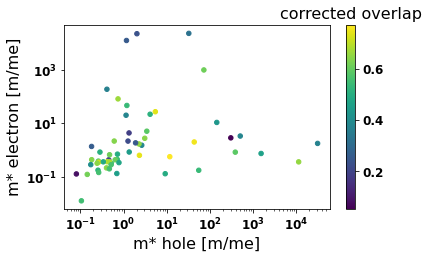

In [17]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

points = ax.scatter(df_filtered['effective_mass_hole'],df_filtered['effective_mass_electron'],c=df_filtered['spatial_overlap_corr'], s=20)
clb = f.colorbar(points, orientation='vertical')
clb.ax.set_title('corrected overlap',size=16)
#plt.title('')
# plt.xlim([1,1])
# plt.ylim([1,1])
plt.xlabel('m* hole [m/me]')
plt.ylabel('m* electron [m/me]')
plt.tick_params(labelsize=12)
clb.ax.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

<Figure size 432x288 with 0 Axes>

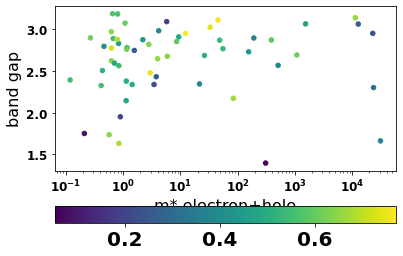

In [18]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')

points = ax.scatter(df_filtered['effective_mass_hole']+df_filtered['effective_mass_electron'],df_filtered['bandgap_corr'],c=df_filtered['spatial_overlap_corr'], s=20)
f.colorbar(points, orientation='horizontal')
#plt.title('')
# plt.xlim([1,1])
# plt.ylim([1,1])
plt.xlabel('m* electron+hole')
plt.ylabel('band gap')
plt.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

<Figure size 432x288 with 0 Axes>

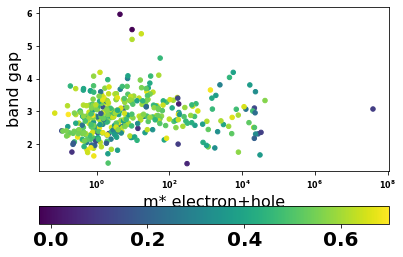

In [19]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')

points = ax.scatter(filt_ovlp['effective_mass_hole']+filt_ovlp['effective_mass_electron'],filt_ovlp['bandgap_corr'],c=filt_ovlp['spatial_overlap_corr'], s=20)
f.colorbar(points, orientation='horizontal')
#plt.title('')
# plt.xlim([1,1])
# plt.ylim([1,1])
plt.xlabel('m* electron+hole')
plt.ylabel('band gap')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

In [20]:
filt_effmasse_10 = df[(df['effective_mass_electron']<10)&(df['effective_mass_hole']<10)]

In [21]:
filt_effmasse_10

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
0,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918,../output_data/cifs/relaxed_structures/opt_opt...
1,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,1.029047e-05,-4.748954,-2.747958,...,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918,../output_data/cifs/relaxed_structures/opt_opt...
6,97421,-2.045300,-0.510691,1.534609,17140N2_ddec.cif,7f3b5fa0-cba7-4929-9fa1-a00aff1a1fd9,2.214151,9.722031e-05,-4.259452,-2.724842,...,1.517164,Z-T,-2.041825,-0.524661,9.198120,0.796877,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.619288,0.563270,../output_data/cifs/relaxed_structures/opt_opt...
7,97547,-0.375677,1.183510,1.559186,17090N3_ddec.cif,cc6473d8-87ea-4818-bc47-b2651eff12ed,4.152470,1.455040e-02,-4.528146,-2.968960,...,1.558614,"(0.000,-0.025,0.025)-Y",-0.375418,1.183196,2.728369,0.176584,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.589043,0.529833,../output_data/cifs/relaxed_structures/opt_opt...
10,97637,-1.434028,0.110530,1.544557,17230N2_ddec.cif,7ee48b47-5a78-430f-aaab-0c1fb1b8e80c,2.767057,5.356504e-06,-4.201085,-2.656527,...,1.461846,Z-Y,-1.387251,0.074596,1.007909,1.585302,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.590572,0.531523,../output_data/cifs/relaxed_structures/opt_opt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,138231,-1.662460,-0.094691,1.567768,21035N2_ddec.cif,342deb7a-9f9d-41b0-9a84-03aa350d3c86,2.996429,1.689346e-06,-4.658888,-3.091119,...,1.566966,\Gamma-\Gamma,-1.662442,-0.095475,0.451419,0.389381,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.746193,0.703564,../output_data/cifs/relaxed_structures/opt_opt...
411,138393,-2.529412,-1.297522,1.231889,21014N2_ddec.cif,97674c5a-a749-4ce5-a388-dd19064c9922,1.593100,5.123200e-05,-4.122512,-2.890622,...,1.212110,\Gamma-\Gamma,-2.529292,-1.317181,1.662739,2.237953,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.627224,0.572042,../output_data/cifs/relaxed_structures/opt_opt...
413,110777,-0.465016,1.867428,2.332443,07001N2_ddec.cif,6e51ca49-0101-4f34-a0d7-bb0fd5525a55,4.455887,4.996695e-05,-4.920902,-2.588458,...,2.212286,X-Y,-0.438679,1.773607,4.342845,0.748821,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.536345,0.471575,../output_data/cifs/relaxed_structures/opt_opt...
415,111643,-4.240020,-0.714874,3.525144,07010N3_ddec.cif,dada8bd9-ace3-4013-9140-19eaaa70e66f,1.827913,4.872614e-08,-6.067933,-2.542787,...,3.524483,\Gamma-\Gamma,-4.239913,-0.715431,6.024766,3.431422,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.666409,0.615362,../output_data/cifs/relaxed_structures/opt_opt...


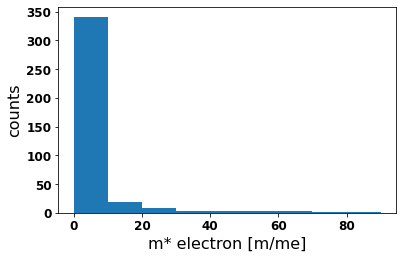

In [22]:
plt.hist(df['effective_mass_electron'], bins=np.arange(0,100,10))
plt.xlabel('m* electron [m/me]')
plt.ylabel('counts')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/stats_effme_100.pdf")
plt.show()

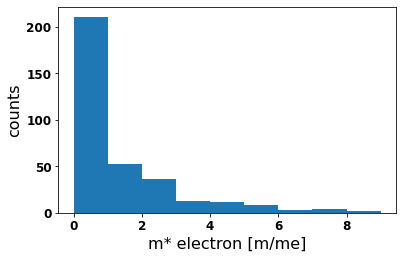

In [23]:
plt.hist(df['effective_mass_electron'], bins=np.arange(0,10,1))
plt.xlabel('m* electron [m/me]')
plt.ylabel('counts')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/stats_effme_10.pdf")
plt.show()

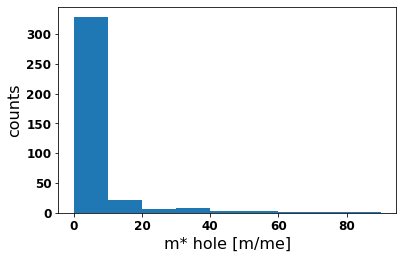

In [24]:
plt.hist(df['effective_mass_hole'], bins=np.arange(0,100,10))
plt.xlabel('m* hole [m/me]')
plt.ylabel('counts')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/stats_effmh_100.pdf")
plt.show()

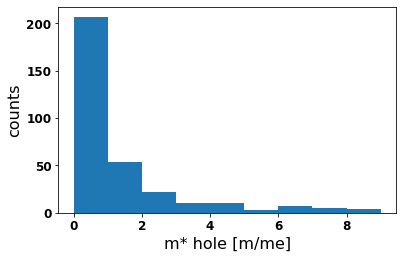

In [25]:
plt.hist(df['effective_mass_hole'], bins=np.arange(0,10,1))
plt.xlabel('m* hole [m/me]')
plt.ylabel('counts')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("../output_data/bsdos/parabolic/prim-ext-min-4/plots/stats_effmh_10.pdf")
plt.show()

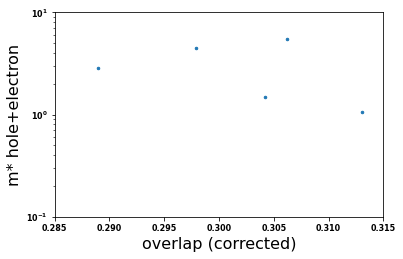

In [26]:
plt.figure()

plt.yscale("log")

plt.scatter(df['spatial_overlap_corr'], df['effective_mass_electron']+df['effective_mass_hole'])
#plt.title('')
plt.xlim([0.3,0.3])
plt.ylim([1,1])
plt.xlabel('overlap (corrected)')
plt.ylabel('m* hole+electron')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

In [27]:
filt_effmass_all = df[(df['effective_mass_electron']<0.5)&(df['effective_mass_hole']<0.5)]

In [28]:
filt_ovlp = df_filtered[df_filtered['spatial_overlap_corr']<0.5]

In [29]:
filt_effm_ovlp = filt_ovlp[(filt_ovlp['effective_mass_electron']<10)&(filt_ovlp['effective_mass_hole']<10)]

In [18]:
filt_ovlp_her = df_filtered_her[df_filtered_her['spatial_overlap_corr']<0.5]
filt_effm_ovlp_her = filt_ovlp_her[(filt_ovlp_her['effective_mass_electron']<10)&(filt_ovlp_her['effective_mass_hole']<10)]

filt_ovlp_oer = df_filtered_oer[df_filtered_oer['spatial_overlap_corr']<0.5]
filt_effm_ovlp_oer = filt_ovlp_oer[(filt_ovlp_oer['effective_mass_electron']<10)&(filt_ovlp_oer['effective_mass_hole']<10)]

print(len(filt_effm_ovlp_her), len(filt_effm_ovlp_oer))

filt_effm_ovlp_her.to_csv('../output_data/bsdos/parabolic/prim-ext-min-4/filtered_bgovlpm_her.csv',index=False)
filt_effm_ovlp_oer.to_csv('../output_data/bsdos/parabolic/prim-ext-min-4/filtered_bgovlpm_oer.csv',index=False)

63 18


In [31]:
filt_effm_ovlp

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,direct_band_gap,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr
1,97669,-1.306618,0.383491,1.690108,18040N3_ddec.cif,6993536a-2460-415b-b206-1c5305be4402,3.799800,1.819761e-03,-5.106418,-3.416309,...,True,1.689814,\Gamma-\Gamma,-1.306651,0.383163,2.633926,1.532850,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.455983,0.382734
2,92260,-3.647145,-2.811802,0.835343,15100N2_ddec.cif,c4e9d75d-902a-46d1-93cb-f77a47dfad7b,1.928616,1.543895e-10,-5.575761,-4.740418,...,True,0.834553,\Gamma-\Gamma,-3.647072,-2.812519,0.453680,0.436796,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.288606,0.197697
4,112924,-2.391777,-1.235854,1.155922,13070N2_ddec.cif,efa28969-670a-4b29-929f-0f059fce0362,3.295663,1.645467e-08,-5.687440,-4.531517,...,True,1.157043,\Gamma-\Gamma,-2.392679,-1.235635,0.721657,0.710510,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.556486,0.493841
10,138537,-1.442230,0.158928,1.601157,21072N2_ddec.cif,ea095a9e-56dd-439f-a999-9986ce36cd44,3.528240,5.870998e-04,-4.970470,-3.369312,...,True,1.599769,\Gamma-\Gamma,-1.442020,0.157749,1.348618,0.854211,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.512705,0.445440
15,137950,-3.119757,-1.339073,1.780683,20471N2_ddec.cif,0eadb6f0-b80e-403f-80c2-0454d73472d1,1.875384,7.490272e-06,-4.995141,-3.214457,...,True,1.779792,\Gamma-\Gamma,-3.119676,-1.339884,1.337391,4.420135,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.278234,0.186231
17,138915,-0.500882,1.063082,1.563963,21040N3_ddec.cif,ffe3a5fb-9add-4a98-9174-b6ac37acc002,4.986086,5.155075e-03,-5.486967,-3.923004,...,True,1.562877,\Gamma-\Gamma,-0.500617,1.062260,0.697420,0.133932,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.518362,0.451694
20,112214,-3.217804,-2.548262,0.669542,21080N2_ddec.cif,bf947c4c-671d-4efc-9ab2-28447b3aa6f7,2.216391,5.692240e-07,-5.434194,-4.764652,...,True,0.669621,\Gamma-\Gamma,-3.216758,-2.547138,0.080633,0.129013,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.184707,0.082835
22,124107,-3.665419,-2.509350,1.156068,17100N2_ddec.cif,0762486b-1110-4d65-99db-a539b7d5d963,2.319654,5.801369e-07,-5.985073,-4.829004,...,True,1.155479,\Gamma-\Gamma,-3.665414,-2.509936,1.265649,2.189733,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.305307,0.216160
26,126407,-1.101785,0.392804,1.494588,19144N2_ddec.cif,c1da40e9-b403-48bd-b44f-d0fa9fc10e61,4.664689,5.115567e-03,-5.766474,-4.271885,...,True,1.494673,\Gamma-\Gamma,-1.102134,0.392539,0.181375,1.380482,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.347289,0.262571
36,126362,-2.731504,-1.102027,1.629476,19121N2_ddec.cif,33b21f98-9b36-4e93-aa77-7b39dcdcbab7,2.436335,2.801326e-03,-5.167839,-3.538362,...,True,1.630248,\Gamma-\Gamma,-2.731763,-1.101515,9.198119,0.131572,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.554896,0.492083


In [32]:
filt_effm_ovlp.to_csv('../output_data/bsdos/parabolic/prim-ext-min-4/filtered_bgovlpm.csv',index=False)

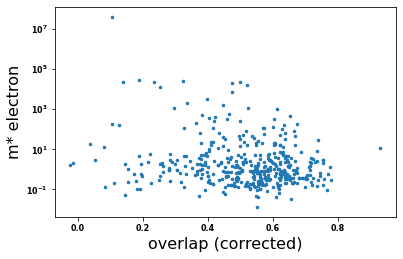

In [33]:
plt.figure()

plt.yscale("log")

plt.scatter(df['spatial_overlap_corr'], df['effective_mass_electron'])
#plt.title('')
plt.xlabel('overlap (corrected)')
plt.ylabel('m* electron')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

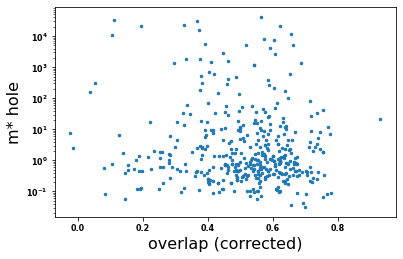

In [34]:
plt.figure()

plt.yscale("log")

plt.scatter(df['spatial_overlap_corr'], df['effective_mass_hole'])
#plt.title('')
plt.xlabel('overlap (corrected)')
plt.ylabel('m* hole')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

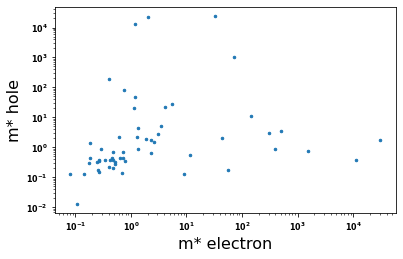

In [35]:
plt.figure()

plt.yscale("log")
plt.xscale("log")

plt.scatter(df_filtered['effective_mass_hole'], df_filtered['effective_mass_electron'])
#plt.title('')
plt.xlabel('m* electron')
plt.ylabel('m* hole')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

<Figure size 432x288 with 0 Axes>

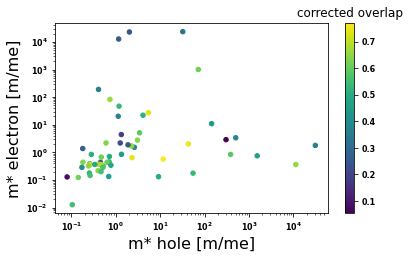

In [36]:
plt.figure()

f,ax=plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')

points = ax.scatter(df_filtered['effective_mass_hole'],df_filtered['effective_mass_electron'],c=df_filtered['spatial_overlap_corr'], s=20)
clb = f.colorbar(points, orientation='vertical')
clb.ax.set_title('corrected overlap',size=12)
#plt.title('')
# ax.set_xlim([1,1])
# ax.set_ylim([1,4])
plt.xlabel('m* hole [m/me]')
plt.ylabel('m* electron [m/me]')
plt.tick_params(labelsize=8)
clb.ax.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

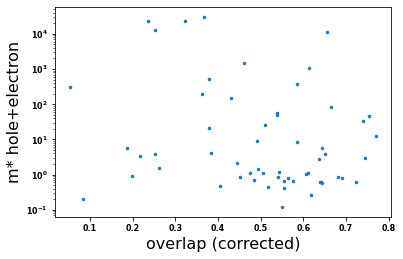

In [37]:
plt.figure()

plt.yscale("log")

plt.scatter(df_filtered['spatial_overlap_corr'], df_filtered['effective_mass_electron']+df_filtered['effective_mass_hole'])
#plt.title('')
plt.xlabel('overlap (corrected)')
plt.ylabel('m* hole+electron')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/IPEA")
plt.show()

In [30]:
# names = []
# cofs2d = []
# cofs3d = []
# for i in df['label']:
#     n = i.split("_")[0]
#     names.append(n)
#     if n.endswith('2'):
#         cofs2d.append(i)
#     else:
#         cofs3d.append(i)

df.drop_duplicates()

names = []
cofs2d = pd.DataFrame()
cofs3d = pd.DataFrame()
for i in df['label']:
    n = i.split("_")[0]
    names.append(n)
    if n.endswith('N2'):
        cofs2d = cofs2d.append(df[df['label']==i])
    else:
        cofs3d = cofs3d.append(df[df['label']==i])

# cofs2d.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs2d.csv")
# cofs3d.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs3d.csv")

names = []
cofs2df = pd.DataFrame()
cofs3df = pd.DataFrame()
for i in df_filtered['label']:
    n = i.split("_")[0]
    names.append(n)
    if n.endswith('2'):
        cofs2df = cofs2df.append(df_filtered[df_filtered['label']==i])
    else:
        cofs3df = cofs3df.append(df_filtered[df_filtered['label']==i])

# cofs2df.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs2df.csv")
# cofs3df.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs3df.csv")

# names = []
# cofs2dfbom = pd.DataFrame()
# cofs3dfbom = pd.DataFrame()
# for i in filt_effm_ovlp['label']:
#     n = i.split("_")[0]
#     names.append(n)
#     if n.endswith('2'):
#         cofs2dfbom = cofs2dfbom.append(filt_effm_ovlp[filt_effm_ovlp['label']==i])
#     else:
#         cofs3dfbom = cofs3dfbom.append(filt_effm_ovlp[filt_effm_ovlp['label']==i])

# cofs2dfbom.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs2dfbgovlpm.csv")
# cofs3dfbom.to_csv("../output_data/bsdos/parabolic/prim-ext-min-4/cofs3dfbgovlpm.csv")

In [31]:
print(len(cofs3d), '3D-COFs and', len(cofs2d), '2D-COFs')
print(len(cofs3df), '3D-COFs filtered and', len(cofs2df), '2D-COFs filtered')

68 3D-COFs and 369 2D-COFs
12 3D-COFs filtered and 45 2D-COFs filtered


In [33]:
cofs2d.drop_duplicates()

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
0,97400,-1.758049,0.242948,2.000995,18060N2_ddec.cif,6f6fadac-c535-495e-a6de-380850b3de44,2.990906,0.000010,-4.748954,-2.747958,...,1.995549,"(-0.275,0.000,0.275)-\Gamma",-1.753107,0.242442,3.109087,0.345991,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.629825,0.574918,../output_data/cifs/relaxed_structures/opt_opt...
2,97379,-2.515671,-1.710665,0.805005,17070N2_ddec.cif,e54a8daf-16d8-4160-8ff5-48ab587b5ce7,2.012077,0.000472,-4.527748,-3.722743,...,0.805014,Y-\Gamma,-2.515340,-1.710325,1160.558066,0.826511,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.598636,0.540438,../output_data/cifs/relaxed_structures/opt_opt...
4,97463,-2.161858,-0.675817,1.486041,17151N2_ddec.cif,8edc1f8b-7df7-4762-8acb-f358fcc0d971,1.947790,0.000051,-4.109648,-2.623607,...,1.484803,\Gamma-Y,-2.162070,-0.677267,0.901133,15.308723,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.671490,0.620978,../output_data/cifs/relaxed_structures/opt_opt...
6,97421,-2.045300,-0.510691,1.534609,17140N2_ddec.cif,7f3b5fa0-cba7-4929-9fa1-a00aff1a1fd9,2.214151,0.000097,-4.259452,-2.724842,...,1.517164,Z-T,-2.041825,-0.524661,9.198120,0.796877,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.619288,0.563270,../output_data/cifs/relaxed_structures/opt_opt...
9,97526,-2.327708,-0.961340,1.366368,17155N2_ddec.cif,131a9a15-aa67-40a3-9237-51d591c05656,2.125383,0.000676,-4.453091,-3.086722,...,1.366712,T-U,-2.327904,-0.961193,17.177658,3059.069265,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.469362,0.397525,../output_data/cifs/relaxed_structures/opt_opt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,110777,-0.465016,1.867428,2.332443,07001N2_ddec.cif,6e51ca49-0101-4f34-a0d7-bb0fd5525a55,4.455887,0.000050,-4.920902,-2.588458,...,2.212286,X-Y,-0.438679,1.773607,4.342845,0.748821,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.536345,0.471575,../output_data/cifs/relaxed_structures/opt_opt...
414,111345,-2.677306,-0.812993,1.864312,07000N2_ddec.cif,eba45d2d-54c1-40bd-ab8f-d5c5cbaeb157,1.847228,0.000014,-4.524534,-2.660221,...,1.864346,Y-\Gamma,-2.677224,-0.812878,416.074173,0.167268,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.526269,0.460436,../output_data/cifs/relaxed_structures/opt_opt...
416,110720,-1.568668,1.482661,3.051328,05000N2_ddec.cif,c4232c59-6cb9-485f-b450-769d2dd545bf,4.191745,0.019445,-5.760413,-2.709084,...,3.047654,Z-\Gamma,-1.566883,1.480771,55.616361,0.397182,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.522836,0.456640,../output_data/cifs/relaxed_structures/opt_opt...
417,111095,-1.635956,0.389956,2.025910,07002N2_ddec.cif,e1e78edf-01b4-4520-ad63-0953e75a0a46,2.932734,0.000362,-4.568689,-2.542778,...,2.015168,\Gamma-Z,-1.636102,0.379066,1.783905,3.962873,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.562790,0.500810,../output_data/cifs/relaxed_structures/opt_opt...


In [40]:
filt_effmasse_1 = df[(df['effective_mass_electron']<0.5)&(df['effective_mass_hole']<0.5)]

In [41]:
filt_effmasse_1

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
12,97692,-1.418881,0.141289,1.560169,17060N2_ddec.cif,17c682fb-0007-404f-9013-5e5c174a4c10,2.957305,1.333439e-03,-4.376185,-2.816015,...,1.512767,Z-\Gamma,-1.371301,0.141466,0.470642,0.322670,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.556584,0.493949,../output_data/cifs/relaxed_structures/opt_opt...
13,97606,-1.618428,-0.624299,0.994128,17180N2_ddec.cif,38d69148-b6a5-4726-90c3-1f14758d8a66,2.136998,9.066727e-08,-3.755425,-2.761297,...,0.994797,\Gamma-\Gamma,-1.619094,-0.624298,0.265547,0.429154,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.553562,0.490608,../output_data/cifs/relaxed_structures/opt_opt...
15,97442,-2.146795,-0.743692,1.403102,17020N2_ddec.cif,6fff609a-1f85-4165-91cb-336e64e426af,2.652791,2.800884e-03,-4.799586,-3.396483,...,1.404932,\Gamma-\Gamma,-2.148013,-0.743080,0.110078,0.214646,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.663562,0.612214,../output_data/cifs/relaxed_structures/opt_opt...
17,97590,-2.277230,-0.833448,1.443781,17030N2_ddec.cif,2c197072-9b05-4801-89d6-a5176e01a8cc,1.732832,6.931886e-07,-4.010062,-2.566280,...,1.443914,\Gamma-\Gamma,-2.277532,-0.833618,0.464335,0.349647,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.638485,0.584491,../output_data/cifs/relaxed_structures/opt_opt...
20,127002,-0.843406,0.116634,0.960040,19431N2_ddec.cif,c62ca077-2abe-4426-9cca-54930eb21ffc,2.888574,3.749489e-02,-3.731980,-2.771939,...,0.958863,\Gamma-A,-0.843894,0.114970,0.041324,0.369471,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.735809,0.692085,../output_data/cifs/relaxed_structures/opt_opt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,126101,-2.169733,-1.015805,1.153927,18101N2_ddec.cif,cda9f5e6-d6d2-49f1-b03f-008d33a7cdd0,1.827505,1.248368e-05,-3.997238,-2.843310,...,1.157196,\Gamma-\Gamma,-2.174148,-1.016952,0.347306,0.108852,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.615913,0.559538,../output_data/cifs/relaxed_structures/opt_opt...
399,116571,-0.834460,0.619294,1.453753,16200N2_ddec.cif,818e9d60-51ac-4d89-a6f3-64600e04a082,5.666804,1.014504e-04,-6.501264,-5.047510,...,1.455575,\Gamma-\Gamma,-0.835974,0.619600,0.242700,0.244950,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.553472,0.490508,../output_data/cifs/relaxed_structures/opt_opt...
400,116569,-1.104856,0.263513,1.368368,16201N2_ddec.cif,b097a41b-3aae-4e5a-bc2c-08d1d75fe581,4.544616,3.147266e-02,-5.649472,-4.281103,...,1.364627,X-V2,-1.097382,0.267245,0.338687,0.366364,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.548594,0.485116,../output_data/cifs/relaxed_structures/opt_opt...
406,138103,-1.714136,-0.108307,1.605828,21033N2_ddec.cif,f4fb3282-cd4c-4bef-a07a-6c59751526fb,3.076360,8.530427e-06,-4.790495,-3.184667,...,1.617521,Y-M2,-1.722874,-0.105353,0.257928,0.138103,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.774107,0.734424,../output_data/cifs/relaxed_structures/opt_opt...


In [10]:
filt_ovlp_1 = df[(df['spatial_overlap_corr']<0.15)]
filt_ovlp_1

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,direct_band_gap,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr
57,92281,-2.196475,-0.411760,1.784715,15140N2_ddec.cif,4c0d61d3-0dd3-4a63-a315-ecc171a7578a,1.615518,1.305978e-05,-3.811993,-2.027277,...,False,1.782013,\Gamma-T,-2.196267,-0.414254,1.735367,2.184636e+04,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.235896,0.139426
73,95712,-0.627464,0.242986,0.870450,16311N2_ddec.cif,87c5a2cc-37b1-4d8d-9963-1ce356a5c5b6,3.441154,3.085580e-03,-4.068618,-3.198168,...,True,0.720153,V2-V2,-0.484606,0.235547,0.773418,1.736625e+02,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.204753,0.104996
91,138458,-2.747606,-2.371842,0.375765,21082N2_ddec.cif,f6258519-5ca4-4606-b221-f29d919275c7,2.158067,2.169375e-05,-4.905673,-4.529908,...,False,0.372804,T2-\Gamma,-2.747743,-2.374939,304.166406,2.893500e+00,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.157880,0.053178
111,138045,-0.786272,0.974341,1.760612,20491N2_ddec.cif,3b2ba6eb-1c91-4e06-b241-735d53740fae,2.256390,2.442697e-03,-3.042662,-1.282050,...,False,1.760258,"(0.475,0.000,0.000)-(0.000,0.000,0.400)",-0.786117,0.974141,11063.114688,3.981085e+07,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.203508,0.103621
118,138026,-2.319468,1.842345,4.161810,20560N3_ddec.cif,ba0ffe18-489a-46a1-a2cb-8415c6f3e902,4.150726,4.505736e-07,-6.470194,-2.308381,...,True,4.161770,\Gamma-\Gamma,-2.319446,1.842324,2.461796,1.936154e+00,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.094660,-0.016712
131,138760,-1.759651,2.014488,3.774137,20561N3_ddec.cif,5ba5749b-c9e1-4568-ae6f-e8f7d0cc1f9e,4.904996,1.945235e-03,-6.664647,-2.890508,...,True,3.774050,\Gamma-\Gamma,-1.759726,2.014324,7.850587,1.599828e+00,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.087952,-0.024128
181,112214,-3.217804,-2.548262,0.669542,21080N2_ddec.cif,bf947c4c-671d-4efc-9ab2-28447b3aa6f7,2.216391,5.692240e-07,-5.434194,-4.764652,...,True,0.669621,\Gamma-\Gamma,-3.216758,-2.547138,0.080633,1.290127e-01,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.184707,0.082835
184,93842,-2.185850,-1.047219,1.138631,16052N2_ddec.cif,97ac2891-ffdf-4548-b8d3-7eac334319e7,2.402936,3.075100e-05,-4.588786,-3.450155,...,False,1.138236,\Gamma-T,-2.186201,-1.047966,0.387383,1.772739e+00,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.241992,0.146165
185,93630,-2.190709,-0.983049,1.207659,16058N2_ddec.cif,034505b2-624e-49c9-a12f-437bed9939c9,2.565510,8.382457e-07,-4.756218,-3.548558,...,True,1.207196,X-X,-2.190013,-0.982817,0.056078,5.411986e-02,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.239374,0.143270
194,93858,-2.131325,-0.963174,1.168150,16054N2_ddec.cif,041efb95-0e91-419e-99d0-62f84b4681d1,2.481054,4.826704e-09,-4.612378,-3.444228,...,False,1.168464,X-\Gamma,-2.131563,-0.963099,33232.909241,2.055470e-01,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.210086,0.110892


In [9]:
filt_ovlp_1['label']

57     15140N2_ddec.cif
73     16311N2_ddec.cif
91     21082N2_ddec.cif
111    20491N2_ddec.cif
118    20560N3_ddec.cif
131    20561N3_ddec.cif
181    21080N2_ddec.cif
184    16052N2_ddec.cif
185    16058N2_ddec.cif
194    16054N2_ddec.cif
196    16051N2_ddec.cif
264    16060N2_ddec.cif
285    20470N2_ddec.cif
Name: label, dtype: object

'DhaTab'*tpb
'NN-TAPH-COF'
'PIC-AA'*tpb
'(R)-DTP-COF'*tpb
'BP-COF-1'*heteroatoms
'BP-COF-2'*heteroatoms
'PIA-AA'*tpa
'MC-COFs'
'CCOF-1'
'COF-119'

In [44]:
df.loc[df.label=='15251N2_ddec.cif']['homo_align']

201   -4.384232
Name: homo_align, dtype: float64

In [45]:
df.loc[df.label=='15251N2_ddec.cif']['lumo_align_corr']

201   -2.54721
Name: lumo_align_corr, dtype: float64

In [46]:
df.loc[df.label=='15251N2_ddec.cif']['bandgap_corr']

201    2.529956
Name: bandgap_corr, dtype: float64

In [47]:
df.loc[df.label=='14080N2_ddec.cif']

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
25,90710,-3.079209,-1.863594,1.215614,14080N2_ddec.cif,cd91bca5-64c1-4194-be2f-143d85f95f85,1.666296,1.937995e-09,-4.745505,-3.52989,...,1.215619,\Gamma-Y,-3.079558,-1.863939,0.097239,0.223755,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.396387,0.31685,../output_data/cifs/relaxed_structures/opt_opt...


In [48]:
ovlp = df["spatial_overlap_corr"]
maxovlp = ovlp.max()
minovlp = ovlp.min()
print('spatial overlap range: ',minovlp,maxovlp)

effme = df["effective_mass_electron"]
maxeffme = effme.max()
mineffme = effme.min()
print('m*e range: ',mineffme,maxeffme)

effmh = df["effective_mass_hole"]
maxeffmh = effmh.max()
mineffmh = effmh.min()
print('m*h range: ',mineffmh,maxeffmh)

spatial overlap range:  -0.0241278600618988 0.9314872312128544
m*e range:  0.0127263305179859 39810854.2899083
m*h range:  0.031029316997558 42782.56196326086


In [49]:
ovlpthr = df[df['spatial_overlap_corr']<0.5] #0.5 threshold for spatial overlap

In [50]:
ovlpthr

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr,relaxed_file
8,97484,-2.588256,-1.141558,1.446697,17240N3_ddec.cif,1a16f6a3-2267-445f-9d76-591cee08844c,1.848649,3.930491e-06,-4.436905,-2.990207,...,1.445874,U-\Gamma,-2.587575,-1.141701,133.394297,0.678734,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.558564,0.496138,../output_data/cifs/relaxed_structures/opt_opt...
9,97526,-2.327708,-0.961340,1.366368,17155N2_ddec.cif,131a9a15-aa67-40a3-9237-51d591c05656,2.125383,6.760637e-04,-4.453091,-3.086722,...,1.366712,T-U,-2.327904,-0.961193,17.177658,3059.069265,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.469362,0.397525,../output_data/cifs/relaxed_structures/opt_opt...
11,97576,-2.330245,-0.849706,1.480537,18031N2_ddec.cif,98b710ab-829e-4801-9f3f-b1f405d95c87,3.012947,1.927837e-07,-5.343191,-3.862653,...,1.478445,X-Y,-2.330137,-0.851692,144.056335,10.928625,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.500025,0.431422,../output_data/cifs/relaxed_structures/opt_opt...
12,97692,-1.418881,0.141289,1.560169,17060N2_ddec.cif,17c682fb-0007-404f-9013-5e5c174a4c10,2.957305,1.333439e-03,-4.376185,-2.816015,...,1.512767,Z-\Gamma,-1.371301,0.141466,0.470642,0.322670,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.556584,0.493949,../output_data/cifs/relaxed_structures/opt_opt...
13,97606,-1.618428,-0.624299,0.994128,17180N2_ddec.cif,38d69148-b6a5-4726-90c3-1f14758d8a66,2.136998,9.066727e-08,-3.755425,-2.761297,...,0.994797,\Gamma-\Gamma,-1.619094,-0.624298,0.265547,0.429154,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.553562,0.490608,../output_data/cifs/relaxed_structures/opt_opt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,138132,-1.898904,-0.505919,1.392984,20640N2_ddec.cif,b451685b-57ed-4d31-a0e3-2c33392dd019,2.162881,7.821268e-05,-4.061785,-2.668800,...,1.390550,Y-R2,-1.896626,-0.506076,13.373275,0.127728,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.406240,0.327742,../output_data/cifs/relaxed_structures/opt_opt...
413,110777,-0.465016,1.867428,2.332443,07001N2_ddec.cif,6e51ca49-0101-4f34-a0d7-bb0fd5525a55,4.455887,4.996695e-05,-4.920902,-2.588458,...,2.212286,X-Y,-0.438679,1.773607,4.342845,0.748821,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.536345,0.471575,../output_data/cifs/relaxed_structures/opt_opt...
414,111345,-2.677306,-0.812993,1.864312,07000N2_ddec.cif,eba45d2d-54c1-40bd-ab8f-d5c5cbaeb157,1.847228,1.432319e-05,-4.524534,-2.660221,...,1.864346,Y-\Gamma,-2.677224,-0.812878,416.074173,0.167268,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.526269,0.460436,../output_data/cifs/relaxed_structures/opt_opt...
416,110720,-1.568668,1.482661,3.051328,05000N2_ddec.cif,c4232c59-6cb9-485f-b450-769d2dd545bf,4.191745,1.944522e-02,-5.760413,-2.709084,...,3.047654,Z-\Gamma,-1.566883,1.480771,55.616361,0.397182,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.522836,0.456640,../output_data/cifs/relaxed_structures/opt_opt...


In [75]:
df_filtered_her.loc[df_filtered_her.label=='18140N2_ddec.cif',:]

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,direct_band_gap,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr
93,111996,-2.117455,-0.558371,1.559084,18140N2_ddec.cif,6e024286-f18f-40e7-a2ea-86b86b622836,2.192438,0.000063,-4.309893,-2.750808,...,False,1.551808,X-V,-2.112314,-0.560506,4.72285,30.182105,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.561113,0.498956


In [54]:
ovlpthr = df[df['spatial_overlap_corr']<0.1] #0.5 threshold for spatial overlap

In [55]:
ovlpthr

,pk,homo_energy,lumo_energy,bandgap,label,path,potential,var,homo_align,lumo_align,...,direct_band_gap,band_gap_energy,band_gap_transition,vbm,cbm,effective_mass_hole,effective_mass_electron,cellopt_retrieved,spatial_overlap,spatial_overlap_corr
91,138458,-2.747606,-2.371842,0.375765,21082N2_ddec.cif,f6258519-5ca4-4606-b221-f29d919275c7,2.158067,2.169375e-05,-4.905673,-4.529908,...,False,0.372804,T2-\Gamma,-2.747743,-2.374939,304.166406,2.893500,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.157880,0.053178
118,138026,-2.319468,1.842345,4.161810,20560N3_ddec.cif,ba0ffe18-489a-46a1-a2cb-8415c6f3e902,4.150726,4.505736e-07,-6.470194,-2.308381,...,True,4.161770,\Gamma-\Gamma,-2.319446,1.842324,2.461796,1.936154,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.094660,-0.016712
131,138760,-1.759651,2.014488,3.774137,20561N3_ddec.cif,5ba5749b-c9e1-4568-ae6f-e8f7d0cc1f9e,4.904996,1.945235e-03,-6.664647,-2.890508,...,True,3.774050,\Gamma-\Gamma,-1.759726,2.014324,7.850587,1.599828,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.087952,-0.024128
181,112214,-3.217804,-2.548262,0.669542,21080N2_ddec.cif,bf947c4c-671d-4efc-9ab2-28447b3aa6f7,2.216391,5.692240e-07,-5.434194,-4.764652,...,True,0.669621,\Gamma-\Gamma,-3.216758,-2.547138,0.080633,0.129013,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.184707,0.082835
196,93815,-2.210099,-0.941545,1.268554,16051N2_ddec.cif,48300920-22e9-4c10-ba07-4b4968805140,2.520846,2.852143e-09,-4.730945,-3.462390,...,False,1.268398,\Gamma-T,-2.210192,-0.941794,0.566358,13.114148,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.183463,0.081460
264,116476,-2.733134,-0.843979,1.889154,16060N2_ddec.cif,f0f6c32e-1245-42c2-aa4c-25af01f88af6,2.157556,1.054535e-03,-4.890690,-3.001535,...,False,1.888068,"(0.000,0.000,0.375)-\Gamma",-2.733095,-0.845027,162.517846,18.873160,/home/beatriz/aiida1/.aiida/repository/Beatriz...,0.143094,0.036831


In [12]:
print(df.loc[df.label=='15250N2_ddec.cif','homo_align_corr'], df.loc[df.label=='15250N2_ddec.cif','lumo_align_corr'], df.loc[df.label=='15250N2_ddec.cif','bandgap_corr'], df.loc[df.label=='15250N2_ddec.cif','effective_mass_hole'], df.loc[df.label=='15250N2_ddec.cif','effective_mass_electron'], df.loc[df.label=='15250N2_ddec.cif','spatial_overlap_corr'])

189   -5.337404
Name: homo_align_corr, dtype: float64 189   -2.267912
Name: lumo_align_corr, dtype: float64 189    3.046638
Name: bandgap_corr, dtype: float64 189    0.087943
Name: effective_mass_hole, dtype: float64 189    0.276326
Name: effective_mass_electron, dtype: float64 189    0.780152
Name: spatial_overlap_corr, dtype: float64


In [13]:
print(df.loc[df.label=='15251N2_ddec.cif','homo_align_corr'], df.loc[df.label=='15251N2_ddec.cif','lumo_align_corr'], df.loc[df.label=='15251N2_ddec.cif','bandgap_corr'], df.loc[df.label=='15251N2_ddec.cif','effective_mass_hole'], df.loc[df.label=='15251N2_ddec.cif','effective_mass_electron'], df.loc[df.label=='15251N2_ddec.cif','spatial_overlap_corr'])

201   -5.180789
Name: homo_align_corr, dtype: float64 201   -2.54721
Name: lumo_align_corr, dtype: float64 201    2.529956
Name: bandgap_corr, dtype: float64 201    0.114077
Name: effective_mass_hole, dtype: float64 201    0.047691
Name: effective_mass_electron, dtype: float64 201    0.3733
Name: spatial_overlap_corr, dtype: float64


In [14]:
print(df.loc[df.label=='15252N2_ddec.cif','homo_align_corr'], df.loc[df.label=='15252N2_ddec.cif','lumo_align_corr'], df.loc[df.label=='15252N2_ddec.cif','bandgap_corr'], df.loc[df.label=='15252N2_ddec.cif','effective_mass_hole'], df.loc[df.label=='15252N2_ddec.cif','effective_mass_electron'], df.loc[df.label=='15252N2_ddec.cif','spatial_overlap_corr'])

191   -5.374428
Name: homo_align_corr, dtype: float64 191   -2.707046
Name: lumo_align_corr, dtype: float64 191    2.573966
Name: bandgap_corr, dtype: float64 191    0.124185
Name: effective_mass_hole, dtype: float64 191    0.27931
Name: effective_mass_electron, dtype: float64 191    0.249214
Name: spatial_overlap_corr, dtype: float64


In [15]:
print(df.loc[df.label=='15253N2_ddec.cif','homo_align_corr'], df.loc[df.label=='15253N2_ddec.cif','lumo_align_corr'], df.loc[df.label=='15253N2_ddec.cif','bandgap_corr'], df.loc[df.label=='15253N2_ddec.cif','effective_mass_hole'], df.loc[df.label=='15253N2_ddec.cif','effective_mass_electron'], df.loc[df.label=='15253N2_ddec.cif','spatial_overlap_corr'])

197   -5.740597
Name: homo_align_corr, dtype: float64 197   -2.742374
Name: lumo_align_corr, dtype: float64 197    2.971478
Name: bandgap_corr, dtype: float64 197    0.402173
Name: effective_mass_hole, dtype: float64 197    0.217343
Name: effective_mass_electron, dtype: float64 197    0.641668
Name: spatial_overlap_corr, dtype: float64
